In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
# Import API key
from configureWT import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)





In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q="
#qs="q=""
cities
"&appid="
long=[]
lat = []
temp = []
hum=[]
cloud=[]
wind=[]
citys=[]
record=1
for cities in cities:
    query = f"{url}{cities}&appid={api_key}"
    response = requests.get(query).json()
    #print(response)
    try:
        citys.append(cities)
        lat.append(response['coord']['lat'])  
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        long.append(response['coord']['lon'])
        record=record+1
        #print(f"Processing Record {record} and the City is {cities}")
        
    except:
        # Append null values
        print("Character not found")
        pass



589
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found


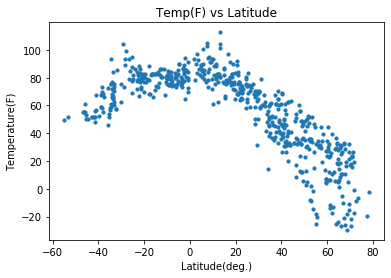

In [3]:
Weather = pd.DataFrame({
    
    'Temperature(F)': temp,
    'Humidity(%)': hum,
    'Cloudiness(%)':cloud,
    'Wind Speed (mph)': wind ,
    'Latitude(deg.)': lat,
    'Longitude(deg.)':long
})

Weather.head()
Dat=[temp,hum,cloud,wind]
yla=["Temperature(F)","Humidity (%)",'Cloudiness(%)','Wind Speed (mph)']
Title=["Temp(F) vs Latitude","Humidity(%) vs Latitude","Cloudiness(%) vs Latitude","Wind Speed(mph) vs Latitude"]
#for Dat in Dat:
    #for yla in yla:
        #for Title in Title:
plt.scatter(Weather["Latitude(deg.)"], Dat[0], marker="o", s=10)
plt.xlabel("Latitude(deg.)")
plt.ylabel(yla[0])
plt.title(Title[0])

plt.savefig("Resources/Temp_vs_Latitude.png")






In [ ]:
#Export to CSV
Weather.to_csv('Resources/API_Weather_Data',index=False)

In [ ]:
plt.scatter(Weather["Latitude(deg.)"], Dat[1], marker="o", s=10)
plt.xlabel("Latitude(deg.)")
plt.ylabel(yla[1])
plt.title(Title[1])
plt.savefig("Resources/Humidity_vs_Latitude.png")

In [ ]:
plt.scatter(Weather["Latitude(deg.)"], Dat[2], marker="o", s=10)
plt.xlabel("Latitude(deg.)")
plt.ylabel(yla[2])
plt.title(Title[2])
plt.savefig("Resources/Cloudiness_vs_Latitude.png")

In [ ]:
plt.scatter(Weather["Latitude(deg.)"], Dat[3], marker="o", s=10)
plt.xlabel("Latitude(deg.)")
plt.ylabel(yla[3])
plt.title(Title[3])
plt.savefig("Resources/Wind_Speed_vs_Latitude.png")

In [13]:
Weather['North or South Hemisphere'] = np.where(Weather['Latitude(deg.)'] >=0 ,"North Hem.","South Hem.")
North=Weather.loc[Weather["North or South Hemisphere"] == "North Hem."]
South=Weather.loc[Weather["North or South Hemisphere"] == "South Hem."]
North

,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed (mph),Latitude(deg.),North or South Hemisphere
1,70.74,57,90,8.05,19.73,North Hem.
4,62.53,63,20,14.99,32.67,North Hem.
6,33.33,99,94,6.53,62.86,North Hem.
7,77.00,100,20,1.12,1.55,North Hem.
9,78.21,75,1,22.17,7.98,North Hem.
...,...,...,...,...,...,...
555,44.15,81,90,10.29,39.45,North Hem.
556,41.00,93,90,10.29,50.70,North Hem.
557,33.60,53,15,0.29,41.12,North Hem.
558,84.20,83,20,3.36,4.71,North Hem.


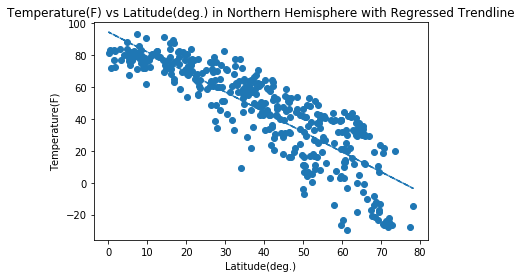

The r-squared is: -0.8578559676522689


In [12]:

slope, Yint, r, p, std_err = st.linregress(North["Latitude(deg.)"],North["Temperature(F)"])    
fit = slope * North["Latitude(deg.)"] + Yint    # Plot the linear model on top of scatter plot 

plt.scatter(North["Latitude(deg.)"],North["Temperature(F)"])
plt.plot(North["Latitude(deg.)"],fit,"--")
#plt.xticks(year, rotation=90)
plt.title("Temperature(F) vs Latitude(deg.) in Northern Hemisphere with Regressed Trendline")

plt.xlabel('Latitude(deg.)')
plt.ylabel('Temperature(F)')
plt.show()
print(f"The r-squared is: {r}")


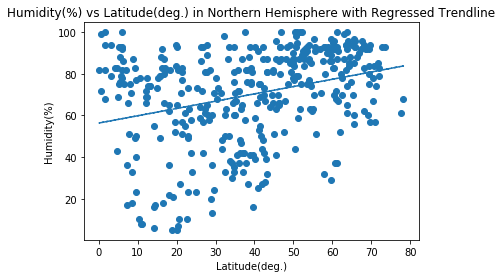

The r-squared is: 0.30617831945507024


In [15]:
slope, Yint, r, p, std_err = st.linregress(North["Latitude(deg.)"],North["Humidity(%)"])    
fit = slope * North["Latitude(deg.)"] + Yint    # Plot the linear model on top of scatter plot 

plt.scatter(North["Latitude(deg.)"],North["Humidity(%)"])
plt.plot(North["Latitude(deg.)"],fit,"--")
#plt.xticks(year, rotation=90)
plt.title("Humidity(%) vs Latitude(deg.) in Northern Hemisphere with Regressed Trendline")

plt.xlabel('Latitude(deg.)')
plt.ylabel("Humidity(%)")
plt.show()
print(f"The r-squared is: {r}")

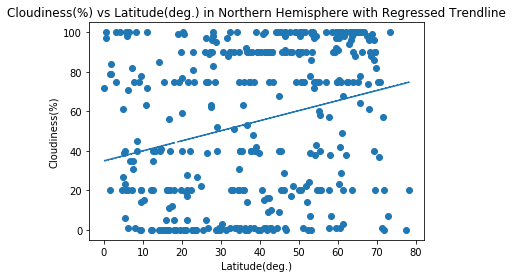

The r-squared is: 0.2670880117318867


In [16]:
slope, Yint, r, p, std_err = st.linregress(North["Latitude(deg.)"],North["Cloudiness(%)"])    
fit = slope * North["Latitude(deg.)"] + Yint    # Plot the linear model on top of scatter plot 

plt.scatter(North["Latitude(deg.)"],North["Cloudiness(%)"])
plt.plot(North["Latitude(deg.)"],fit,"--")
#plt.xticks(year, rotation=90)
plt.title("Cloudiness(%) vs Latitude(deg.) in Northern Hemisphere with Regressed Trendline")

plt.xlabel('Latitude(deg.)')
plt.ylabel('Cloudiness(%)')
plt.show()
print(f"The r-squared is: {r}")

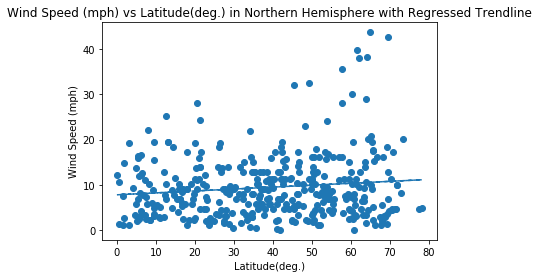

The r-squared is: 0.12096522124013695


In [17]:
slope, Yint, r, p, std_err = st.linregress(North["Latitude(deg.)"],North["Wind Speed (mph)"])    
fit = slope * North["Latitude(deg.)"] + Yint    # Plot the linear model on top of scatter plot 

plt.scatter(North["Latitude(deg.)"],North["Wind Speed (mph)"])
plt.plot(North["Latitude(deg.)"],fit,"--")
#plt.xticks(year, rotation=90)
plt.title("Wind Speed (mph) vs Latitude(deg.) in Northern Hemisphere with Regressed Trendline")

plt.xlabel('Latitude(deg.)')
plt.ylabel('Wind Speed (mph)')
plt.show()
print(f"The r-squared is: {r}")

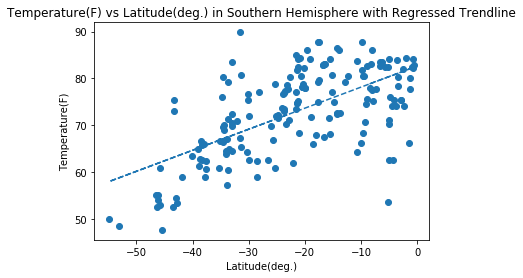

The r-squared is: 0.6316055932184046


In [18]:
slope, Yint, r, p, std_err = st.linregress(South["Latitude(deg.)"],South["Temperature(F)"])    
fit = slope * South["Latitude(deg.)"] + Yint    # Plot the linear model on top of scatter plot 

plt.scatter(South["Latitude(deg.)"],South["Temperature(F)"])
plt.plot(South["Latitude(deg.)"],fit,"--")
#plt.xticks(year, rotation=90)
plt.title("Temperature(F) vs Latitude(deg.) in Southern Hemisphere with Regressed Trendline")

plt.xlabel('Latitude(deg.)')
plt.ylabel('Temperature(F)')
plt.show()
print(f"The r-squared is: {r}")

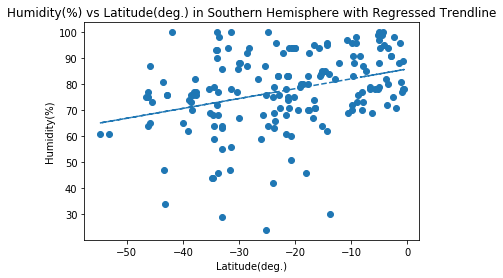

The r-squared is: 0.33021818651114265


In [19]:
slope, Yint, r, p, std_err = st.linregress(South["Latitude(deg.)"],South["Humidity(%)"])    
fit = slope * South["Latitude(deg.)"] + Yint    # Plot the linear model on top of scatter plot 

plt.scatter(South["Latitude(deg.)"],South["Humidity(%)"])
plt.plot(South["Latitude(deg.)"],fit,"--")
#plt.xticks(year, rotation=90)
plt.title("Humidity(%) vs Latitude(deg.) in Southern Hemisphere with Regressed Trendline")

plt.xlabel('Latitude(deg.)')
plt.ylabel('Humidity(%)')
plt.show()
print(f"The r-squared is: {r}")

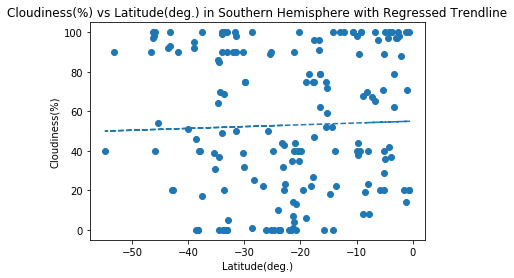

The r-squared is: 0.03324734767080772


In [20]:
slope, Yint, r, p, std_err = st.linregress(South["Latitude(deg.)"],South["Cloudiness(%)"])    
fit = slope * South["Latitude(deg.)"] + Yint    # Plot the linear model on top of scatter plot 

plt.scatter(South["Latitude(deg.)"],South["Cloudiness(%)"])
plt.plot(South["Latitude(deg.)"],fit,"--")
#plt.xticks(year, rotation=90)
plt.title("Cloudiness(%) vs Latitude(deg.) in Southern Hemisphere with Regressed Trendline")

plt.xlabel('Latitude(deg.)')
plt.ylabel('Cloudiness(%)')
plt.show()
print(f"The r-squared is: {r}")

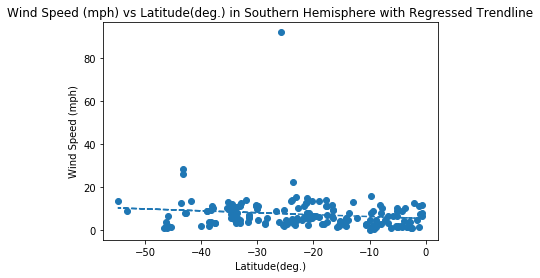

The r-squared is: -0.14846547702187196


In [21]:
slope, Yint, r, p, std_err = st.linregress(South["Latitude(deg.)"],South["Wind Speed (mph)"])    
fit = slope * South["Latitude(deg.)"] + Yint    # Plot the linear model on top of scatter plot 

plt.scatter(South["Latitude(deg.)"],South["Wind Speed (mph)"])
plt.plot(South["Latitude(deg.)"],fit,"--")
#plt.xticks(year, rotation=90)
plt.title("Wind Speed (mph) vs Latitude(deg.) in Southern Hemisphere with Regressed Trendline")

plt.xlabel('Latitude(deg.)')
plt.ylabel('Wind Speed (mph)')
plt.show()
print(f"The r-squared is: {r}")